# 1. Importando as bibliotecas que serão utilizadas:

In [103]:
import yahoofinancials as yf
import numpy as np
import pandas as pd
import statistics as st
import random as rd
import matplotlib.pyplot as plt
import scipy as sp 
import datetime as dt

# 2. Escolher a ação e datas que serão utilizadas:

In [104]:
print('////////////////////////////////////////////////////////////////////////////')
print('Qual ação quer utilizar para testar no programa?')
print('OBS: para ações brasileiras - "ticker.SA" e para americanas apenas seu ticker. ')
t = input('ação escolhida --> ')
print('////////////////////////////////////////////////////////////////////////////')
print('Qual período quer analisar?')
print('OBS: colocar as datas no seguinte formato: aaaa-mm-dd')
inicio = input('data de início --> ')
fim = input('data final --> ')
print('////////////////////////////////////////////////////////////////////////////')
print('Por fim, qual a frequência na qual os dados devem ser coletados?')
print('OBS: diário = "daily", semanal = "weekly", mensal = "monthly"')
freq = input('frequência -->')
print('////////////////////////////////////////////////////////////////////////////')

////////////////////////////////////////////////////////////////////////////
Qual ação quer utilizar para testar no programa?
OBS: para ações brasileiras - "ticker.SA" e para americanas apenas seu ticker. 


ação escolhida -->  BOVA11.SA


////////////////////////////////////////////////////////////////////////////
Qual período quer analisar?
OBS: colocar as datas no seguinte formato: aaaa-mm-dd


data de início -->  2019-01-01
data final -->  2022-01-01


////////////////////////////////////////////////////////////////////////////
Por fim, qual a frequência na qual os dados devem ser coletados?
OBS: diário = "daily", semanal = "weekly", mensal = "monthly"


frequência --> daily


////////////////////////////////////////////////////////////////////////////


# 3. Transformando os dados requeridos em um data Frame contendo as datas e os preços de fechamento ajustado:

In [105]:
ticker = yf.YahooFinancials(t).get_historical_price_data(inicio, fim, freq) #busca os dados para a ação escolhida
dados = pd.DataFrame(ticker[t]['prices']) #cria o DataFrame com os dados obtidos
dados = dados.drop(['high','low','open','volume','close','date'],axis=1) #deleta essas colunas
dados.rename(columns={'formatted_date' : 'data', 'adjclose' : 'fechamento'}, inplace=True) #renomeia essas colunas
dados = dados[['data','fechamento']] #troca a ordem das colunas
dados

,data,fechamento
0,2019-01-02,87.900002
1,2019-01-03,88.000000
2,2019-01-04,88.500000
3,2019-01-07,88.480003
4,2019-01-08,88.830002
...,...,...
738,2021-12-23,100.849998
739,2021-12-27,101.599998
740,2021-12-28,101.059998
741,2021-12-29,100.250000


# 4. Gráfico do fechamento ajustado no período  do ativo escolhido:

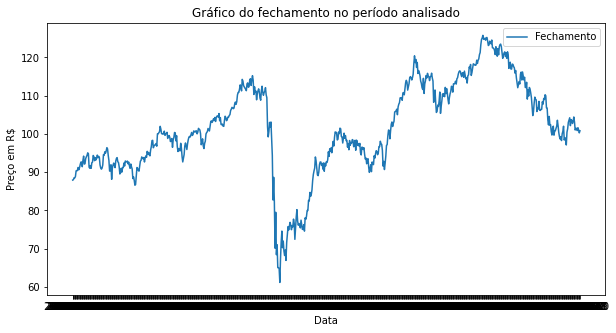

In [52]:
figura1=plt.plot(dados['data'], dados['fechamento'])
plt.title('Gráfico do fechamento no período analisado')
plt.xlabel('Data')
plt.ylabel('Preço em R$')
plt.legend(['Fechamento'])
plt.rcParams['figure.figsize']=[15,10]

# 5. Cálculo dos retornos e volatilidade da ação:

In [113]:
#define uma função para os retornos diários
def retornos(fechamento):
    retornos=[0] #o primeiro dado será vazio pois não é possível o cálculo do retorno para ele
    for i in range(1,len(fechamento)): 
         retornos.append(fechamento[i]/fechamento[i-1] -1) #cálculo do retorno
    return np.array(retornos)

retorno['retornos'] = retornos(dados['fechamento'])

#define uma função para os retornos acumulados
def retornos_acumulados(retornos_por_periodo):
    capital = 1 #define um capital inicial de 1
    retornos = [] #e uma lista vazia de retornos
    for r in retornos_por_periodo:
        capital += capital*r #calcula o crescimento do patrimônio ao longo dos retornos diários/por trades calculados anteriormente
        retornos.append(capital-1) #retorno então seria esse crescimento menos 1
    return retornos

retorno['retorno acumulado'] = retornos_acumulados(retorno['retornos']) #adiciona ao DataFrame criado, o cálculo dos retornos acumulados da estratégia do robô
tam=len(retorno)  #vê o tamanho do DataFrame

#define uma função para que seja calculado quantos anos possui o período da análise
def anos(data_final,data_inicial):
    return int(((data_final - data_inicial).days)/365)
    
data_final = dt.datetime.strptime(fim, '%Y-%m-%d').date() #transforma a data final em forma de data
data_inicial = dt.datetime.strptime(inicio, '%Y-%m-%d').date() #transforma a data inicial em forma de data
n_anos = anos(data_final,data_inicial) #calcula o número de anos usando a função criada
    
retorno_anualizado = (1 + retorno['retorno acumulado'][tam-1])**(1/n_anos) - 1 #cálculo do retorno anualizado, utilizando o retorno acumulado final e o número de anos da análise
retorno_anualizado

desvpad = np.std(retorno['retornos'])
vol_anualizada = desvpad*(365**(1/2))

0.04670400894758053

# 6. Simulação de Monte Carlo e Gráficos das simulações:

----------------------------------------------------------------


Quantos passos a frente deseja fazer a simulação?  15


----------------------------------------------------------------
----------------------------------------------------------------


Qual o número de simulações que serão feitas?  100


----------------------------------------------------------------


<ipython-input-123-b3e2072dda5f>:16: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  S = sp.zeros(n_passos)
<ipython-input-123-b3e2072dda5f>:25: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  S[i+1]=S[i]+S[i]*(mu-0.5*pow(sigma,2))*dt+sigma*S[i]*sp.sqrt(dt)*e; #cálculo da previsão utilizando aleatorização e certos parâmetros
<ipython-input-123-b3e2072dda5f>:25: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  S[i+1]=S[i]+S[i]*(mu-0.5*pow(sigma,2))*dt+sigma*S[i]*sp.sqrt(dt)*e; #cálculo da previsão utilizando aleatorização e certos parâmetros
<ipython-input-123-b3e2072dda5f>:25: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  S[i+1]=S[i]+S[i]*(mu-0.5*pow(sigma,2))*dt+sigma*S[i]*sp.sqrt(dt)*e; #cálculo da previsão utilizando

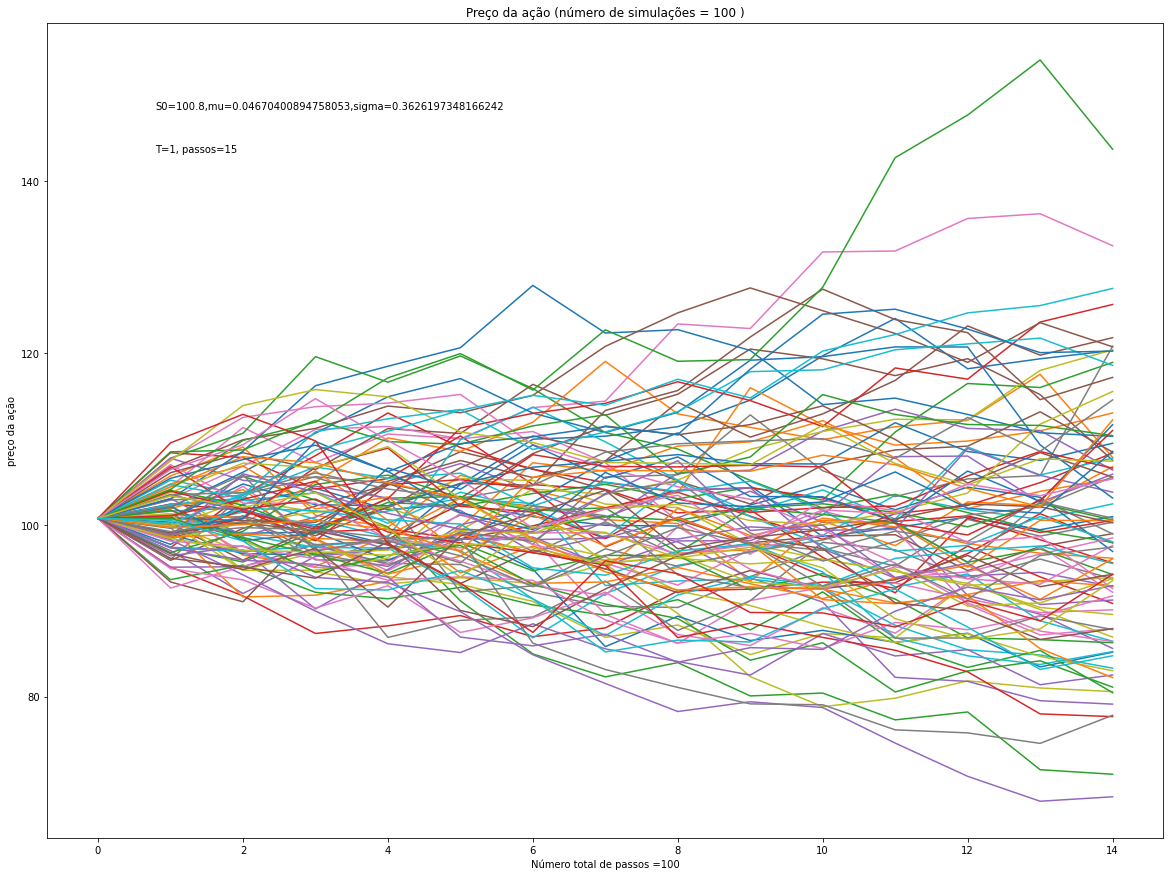

In [123]:
#Parâmetros:
preco_acao_hoje = dados['fechamento'][len(dados)-1] #preço da ação na data 0, ou seja, último dado real coletado
T =1 #maturity date (em anos)
print('----------------------------------------------------------------')
n_passos= int(input('Quantos passos a frente deseja fazer a simulação? ')) #número de passos para frente, ou seja, para quantos dias a frente a previsão será feita
print('----------------------------------------------------------------')
mu =retorno_anualizado #retorno anual esperado 
sigma = vol_anualizada #volatilidade anualizada
sp.random.seed(12345) #semente fixa
dt =T/n_steps #quantidade de vezes que os passos acontecem no período de maturidade T

print('----------------------------------------------------------------')
n_simulacao = int(input('Qual o número de simulações que serão feitas? ')) #número de simulações
print('----------------------------------------------------------------')

S = sp.zeros(n_passos) 
x = range(0, int(n_passos), 1)

dados_finais_simulacao = [] #variável que armazena os últimos dados de cada simulação para o futuro cálculo dos cenários 

for j in range(0, n_simulacao): 
    S[0]= round(preco_acao_hoje,2) #preço zero é o preço de hoje
    for i in x[:-1]: 
        e=sp.random.normal() #distribuição aleatória seguindo uma normal
        S[i+1]=S[i]+S[i]*(mu-0.5*pow(sigma,2))*dt+sigma*S[i]*sp.sqrt(dt)*e; #cálculo da previsão utilizando aleatorização e certos parâmetros
    
    dados_finais_simulacao.append(S[len(S)-1])
    
    plt.plot(x, S) #gráfico da simulação
#
plt.figtext(0.2,0.8,'S0='+str(S[0])+',mu='+str(round(mu,3))+',sigma='+str(round(sigma,3))) 
plt.figtext(0.2,0.76,'T='+str(T)+', passos='+str(int(n_passos))) 
plt.title('Preço da ação (número de simulações = %d ' % n_simulacao +')') 
plt.xlabel('Dias previstos ='+str(int(n_steps))) 
plt.ylabel('preço da ação') 
plt.show()

# 7. Cálculo do cenário Otimista e Pessimista:

In [125]:
print('-------------------------------------------------------------------------------------------------------------------------------')

mediasim=st.mean(dados_finais_simulacao)
desvpsim=st.stdev(dados_finais_simulacao)

print('média dos últimos valores das simulações= ',round(mediasim,3),'e desvio-padrão dos últimos valores das simulações= ',round(desvpsim,3))
print('-------------------------------------------------------------------------------------------------------------------------------')

otim=mediasim+(2*desvpsim)/(st.sqrt(n_simulacoes))
pesm=mediasim-(2*desvpsim)/(st.sqrt(n_simulacoes)) 

print('INTERVALO ESTIMADO PARA O VALOR DA AÇÃO APÓS OS DIAS SIMULADOS :')
print('CENÁRIO OTIMISTA: R$',round(otim,2))
print('CENÁRIO ATUAL: R$', round(dados['fechamento'][len(dados)-1],2))
print('CENÁRIO PESSIMISTA: R$',round(pesm,2))
print('ou seja, após os dias escolhidos para simular, o valor da cotação deve estar, com 95% de confiança dentro desse intervalo')
print('-------------------------------------------------------------------------------------------------------------------------------')

-------------------------------------------------------------------------------------------------------------------------------
média dos últimos valores das simulações=  99.751 e desvio-padrão dos últimos valores das simulações=  13.744
-------------------------------------------------------------------------------------------------------------------------------
INTERVALO ESTIMADO PARA O VALOR DA AÇÃO APÓS OS DIAS SIMULADOS :
CENÁRIO OTIMISTA: R$ 100.62
CENÁRIO ATUAL: R$ 100.8
CENÁRIO PESSIMISTA: R$ 98.88
ou seja, após os dias escolhidos para simular, o valor da cotação deve estar, com 95% de confiança dentro desse intervalo
-------------------------------------------------------------------------------------------------------------------------------
